In [199]:
import os
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [121]:
miku_dir = os.listdir("V:/CVison/hmiku_dataset/")
zerotwo_dir = os.listdir("V:/CVison/zero_two_dataset/")

In [122]:
lim = 10
miku_images = [None]*lim
j = 0
for x in miku_dir:
    miku_images[j] = imread("V:/CVison/hmiku_dataset/"+x)
    j+=1

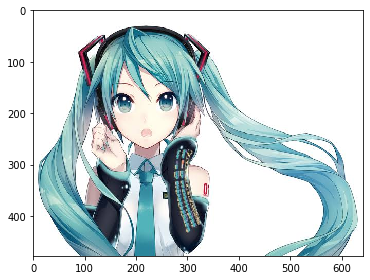

In [123]:
imshow(miku_images[8])

In [124]:
zerotwo_images = [None]*lim
j = 0
for x in zerotwo_dir:
    zerotwo_images[j] = imread("V:/CVison/zero_two_dataset/"+x)
    j+=1

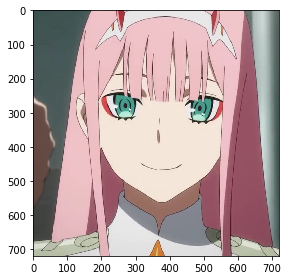

In [126]:
imshow(zerotwo_images[0])

In [127]:
zero_grey = [None]*lim
miku_grey = [None]*lim
j = 0
for x in zerotwo_images:
    zero_grey[j] = rgb2gray(zerotwo_images[j])
    j+=1
j = 0
for x in miku_images:
    miku_grey[j] = rgb2gray(miku_images[j])
    j+=1

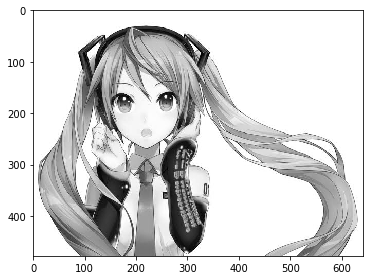

In [128]:
imshow(miku_grey[8])

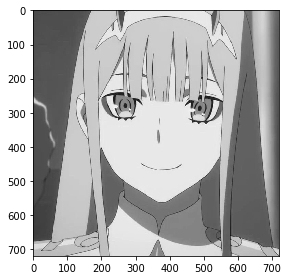

In [130]:
imshow(zero_grey[0])

In [131]:
type(miku_grey[8].shape)

tuple

In [132]:
j = 0
for x in miku_grey:
    h = x.shape[0]
    w = x.shape[1]
    miku_grey[j] = x.reshape(h,w)
    j+=1

In [133]:
zero_re = [None]*lim
miku_re = [None]*lim
j = 0
for x in miku_grey:
    miku_re[j] = resize(miku_grey[j],(256,256))
    j+=1

In [134]:
j =0
for x in zero_grey:
    zero_re[j] = resize(x,(256,256))
    j+=1

(256, 256)

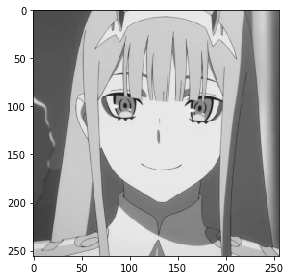

In [146]:
imshow(zero_re[0])
zero_re[0].shape

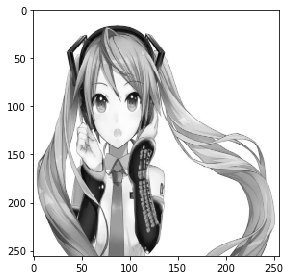

In [147]:
imshow(miku_re[8])

In [151]:
miku_shape = miku_re[0].shape
miku_flatten_size= miku_shape[0]*miku_shape[1]
print(miku_flatten)
zero_flatten_size = zero_re[0].shape[0]*zero_re[0].shape[1]
print(zero_flatten)

65536
65536


In [231]:
def img_pre_processing(imgpath):
    img = imread(imgpath)
    img = rgb2gray(img)
    img = resize(img,(256,256))
    img_flatten_size = img.shape[0]*img.shape[1]
    img = np.ndarray.flatten(img).reshape(img_flatten_size,1)
    img = np.rollaxis(img,axis=1,start =0)
    img = img.reshape(1,img_flatten_size)
    img_data = pd.DataFrame(img)
    return img_data

In [154]:
for i in range(10):
    miku_re[i] =np.ndarray.flatten(miku_re[i]).reshape(miku_flatten_size,1) 
    zero_re[i] = np.ndarray.flatten(zero_re[i]).reshape(zero_flatten_size,1)

In [155]:
miku_re = np.dstack(miku_re)

In [161]:
miku_re = np.rollaxis(miku_re,axis=2,start = 0)

In [162]:
miku_re = miku_re.reshape(10,miku_flatten_size)

In [163]:
miku_data = pd.DataFrame(miku_re)

In [164]:
miku_data

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,1.000000,1.000000,0.900608,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.278196,0.775431,1.000000,0.744499,0.193661,0.958451,0.581359,1.000000,0.441379,0.817169
1,0.230744,0.649823,1.000000,0.721900,0.722304,0.697868,0.671056,1.000000,0.479876,0.834760,...,0.384310,0.453338,0.000000,0.965600,0.968627,1.000000,0.048638,0.000000,1.000000,1.000000
2,0.393987,0.511811,0.000000,0.967577,0.968627,1.000000,0.137488,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.931755,0.294458,0.858126,0.497446,0.000000,0.964706,0.968627,0.584406
3,1.000000,0.000000,0.943570,0.287916,0.858126,0.747735,0.000000,0.964706,0.968627,0.594893,...,0.000004,0.964706,0.495758,0.148905,0.798258,0.728769,0.702168,0.903638,0.655097,0.836816
4,0.000000,0.964706,0.501201,0.139701,0.825400,0.858891,0.625097,0.909846,0.656025,0.851647,...,1.000000,0.589932,0.873751,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000
5,1.000000,0.998177,0.622837,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.968627,0.544970,0.999881,0.005843,1.000000,0.951698,0.417349,1.000000,0.000000,0.964630
6,0.968627,0.588533,0.998483,0.006498,1.000000,0.954109,0.801278,1.000000,0.000000,0.965884,...,0.941907,0.672348,0.000000,0.977761,0.967253,0.246146,0.738819,0.000000,0.361723,0.753576
7,0.940967,0.669398,0.000000,0.966715,0.956120,0.284861,0.727113,0.000000,0.364606,0.923273,...,1.000000,0.000000,0.416755,0.761702,0.922465,1.000000,0.634779,0.964706,0.968627,0.074467
8,1.000000,0.000000,0.414341,0.754255,0.922101,1.000000,0.571946,0.964706,0.968627,0.074467,...,0.146344,0.964706,0.968627,0.067606,0.931438,0.491884,1.000000,0.167816,0.290484,1.000000
9,0.221496,0.964706,0.968627,0.067606,0.928883,0.436665,1.000000,0.177803,0.291895,0.999990,...,1.000000,0.308035,0.847763,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000


In [166]:
zero_re= np.dstack(zero_re)

In [167]:
zero_re = np.rollaxis (zero_re, axis =2 , start =0)

In [168]:
zero_re = miku_re.reshape(10,zero_flatten_size)
zero_data = pd.DataFrame(zero_re)

In [169]:
zero_data

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,1.000000,1.000000,0.900608,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.278196,0.775431,1.000000,0.744499,0.193661,0.958451,0.581359,1.000000,0.441379,0.817169
1,0.230744,0.649823,1.000000,0.721900,0.722304,0.697868,0.671056,1.000000,0.479876,0.834760,...,0.384310,0.453338,0.000000,0.965600,0.968627,1.000000,0.048638,0.000000,1.000000,1.000000
2,0.393987,0.511811,0.000000,0.967577,0.968627,1.000000,0.137488,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.931755,0.294458,0.858126,0.497446,0.000000,0.964706,0.968627,0.584406
3,1.000000,0.000000,0.943570,0.287916,0.858126,0.747735,0.000000,0.964706,0.968627,0.594893,...,0.000004,0.964706,0.495758,0.148905,0.798258,0.728769,0.702168,0.903638,0.655097,0.836816
4,0.000000,0.964706,0.501201,0.139701,0.825400,0.858891,0.625097,0.909846,0.656025,0.851647,...,1.000000,0.589932,0.873751,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000
5,1.000000,0.998177,0.622837,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.968627,0.544970,0.999881,0.005843,1.000000,0.951698,0.417349,1.000000,0.000000,0.964630
6,0.968627,0.588533,0.998483,0.006498,1.000000,0.954109,0.801278,1.000000,0.000000,0.965884,...,0.941907,0.672348,0.000000,0.977761,0.967253,0.246146,0.738819,0.000000,0.361723,0.753576
7,0.940967,0.669398,0.000000,0.966715,0.956120,0.284861,0.727113,0.000000,0.364606,0.923273,...,1.000000,0.000000,0.416755,0.761702,0.922465,1.000000,0.634779,0.964706,0.968627,0.074467
8,1.000000,0.000000,0.414341,0.754255,0.922101,1.000000,0.571946,0.964706,0.968627,0.074467,...,0.146344,0.964706,0.968627,0.067606,0.931438,0.491884,1.000000,0.167816,0.290484,1.000000
9,0.221496,0.964706,0.968627,0.067606,0.928883,0.436665,1.000000,0.177803,0.291895,0.999990,...,1.000000,0.308035,0.847763,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000


In [170]:
miku_data["label"] = "Hatsune_miku"
zero_data["label"] = "Zero_two"

In [173]:
waifu = pd.concat([miku_data,zero_data])

In [245]:
from sklearn.utils import shuffle
img_test =imread("V:/CVison/hmiku2.png")

In [175]:
anime_waifu = shuffle(waifu).reset_index()

In [176]:
anime_waifu

,index,0,1,2,3,4,5,6,7,8,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,label
0,5,1.000000,0.998177,0.622837,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,...,0.544970,0.999881,0.005843,1.000000,0.951698,0.417349,1.000000,0.000000,0.964630,Hatsune_miku
1,9,0.221496,0.964706,0.968627,0.067606,0.928883,0.436665,1.000000,0.177803,0.291895,...,0.308035,0.847763,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,Zero_two
2,6,0.968627,0.588533,0.998483,0.006498,1.000000,0.954109,0.801278,1.000000,0.000000,...,0.672348,0.000000,0.977761,0.967253,0.246146,0.738819,0.000000,0.361723,0.753576,Zero_two
3,0,1.000000,1.000000,0.900608,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,...,0.775431,1.000000,0.744499,0.193661,0.958451,0.581359,1.000000,0.441379,0.817169,Zero_two
4,3,1.000000,0.000000,0.943570,0.287916,0.858126,0.747735,0.000000,0.964706,0.968627,...,0.964706,0.495758,0.148905,0.798258,0.728769,0.702168,0.903638,0.655097,0.836816,Zero_two
5,4,0.000000,0.964706,0.501201,0.139701,0.825400,0.858891,0.625097,0.909846,0.656025,...,0.589932,0.873751,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,Hatsune_miku
6,2,0.393987,0.511811,0.000000,0.967577,0.968627,1.000000,0.137488,0.000000,1.000000,...,0.000000,0.931755,0.294458,0.858126,0.497446,0.000000,0.964706,0.968627,0.584406,Zero_two
7,3,1.000000,0.000000,0.943570,0.287916,0.858126,0.747735,0.000000,0.964706,0.968627,...,0.964706,0.495758,0.148905,0.798258,0.728769,0.702168,0.903638,0.655097,0.836816,Hatsune_miku
8,0,1.000000,1.000000,0.900608,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,...,0.775431,1.000000,0.744499,0.193661,0.958451,0.581359,1.000000,0.441379,0.817169,Hatsune_miku
9,7,0.940967,0.669398,0.000000,0.966715,0.956120,0.284861,0.727113,0.000000,0.364606,...,0.000000,0.416755,0.761702,0.922465,1.000000,0.634779,0.964706,0.968627,0.074467,Zero_two


In [179]:
anime_waifu_1 = anime_waifu.drop(['index'],axis = 1)
anime_waifu_1

,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,label
0,1.000000,0.998177,0.622837,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.544970,0.999881,0.005843,1.000000,0.951698,0.417349,1.000000,0.000000,0.964630,Hatsune_miku
1,0.221496,0.964706,0.968627,0.067606,0.928883,0.436665,1.000000,0.177803,0.291895,0.999990,...,0.308035,0.847763,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,Zero_two
2,0.968627,0.588533,0.998483,0.006498,1.000000,0.954109,0.801278,1.000000,0.000000,0.965884,...,0.672348,0.000000,0.977761,0.967253,0.246146,0.738819,0.000000,0.361723,0.753576,Zero_two
3,1.000000,1.000000,0.900608,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.775431,1.000000,0.744499,0.193661,0.958451,0.581359,1.000000,0.441379,0.817169,Zero_two
4,1.000000,0.000000,0.943570,0.287916,0.858126,0.747735,0.000000,0.964706,0.968627,0.594893,...,0.964706,0.495758,0.148905,0.798258,0.728769,0.702168,0.903638,0.655097,0.836816,Zero_two
5,0.000000,0.964706,0.501201,0.139701,0.825400,0.858891,0.625097,0.909846,0.656025,0.851647,...,0.589932,0.873751,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,Hatsune_miku
6,0.393987,0.511811,0.000000,0.967577,0.968627,1.000000,0.137488,0.000000,1.000000,1.000000,...,0.000000,0.931755,0.294458,0.858126,0.497446,0.000000,0.964706,0.968627,0.584406,Zero_two
7,1.000000,0.000000,0.943570,0.287916,0.858126,0.747735,0.000000,0.964706,0.968627,0.594893,...,0.964706,0.495758,0.148905,0.798258,0.728769,0.702168,0.903638,0.655097,0.836816,Hatsune_miku
8,1.000000,1.000000,0.900608,1.000000,0.000000,0.964706,0.968627,1.000000,1.000000,0.000000,...,0.775431,1.000000,0.744499,0.193661,0.958451,0.581359,1.000000,0.441379,0.817169,Hatsune_miku
9,0.940967,0.669398,0.000000,0.966715,0.956120,0.284861,0.727113,0.000000,0.364606,0.923273,...,0.000000,0.416755,0.761702,0.922465,1.000000,0.634779,0.964706,0.968627,0.074467,Zero_two


In [180]:
anime_waifu_1.to_csv("V:/CVison/dset_final/waifu_set_1.csv")

In [181]:
x = anime_waifu_1.values[:,:-1]
y = anime_waifu_1.values[:,-1]
x

array([[0.9999999999999998, 0.998177201076595, 0.6228370031071191, ...,
        1.0, 0.0, 0.9646302756001184],
       [0.2214963228919055, 0.9647058823529413, 0.968627450980392, ...,
        0.9999999999999998, 0.9999999999999998, 0.0],
       [0.968627450980392, 0.5885333045762392, 0.9984831992439562, ...,
        0.0, 0.36172256924817764, 0.7535763342271357],
       ...,
       [0.2307435599352304, 0.649822601300126, 0.9999999999999998, ...,
        0.0, 0.9999999999999998, 0.9999999999999998],
       [0.0, 0.9647058823529412, 0.5012014872897181, ...,
        0.9999999999999998, 0.9999999999999998, 0.0],
       [0.39398740833317886, 0.5118114723969243, 0.0, ...,
        0.9647058823529411, 0.968627450980392, 0.5844059718994619]],
      dtype=object)

In [182]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [185]:
from sklearn import svm

In [187]:
classify = svm.SVC()
classify.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [237]:
path = "V:/CVison/hmiku2.png"
test_data = img_pre_processing(path)

In [238]:
y_predict = classify.predict(test_data)
y_predict

array(['Hatsune_miku'], dtype=object)

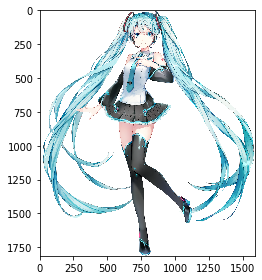

In [246]:
imshow(img_test)